In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os


plt.style.use('seaborn-bright')

In [2]:
def restructure_database(interval='hour'):

    dir_gdl = '../data/processed/'

    simaj_reestructurado_all = pd.DataFrame()

    # check for file or directory in dir_gdl
    for file in os.listdir(dir_gdl):

        if file.endswith('.csv'):
            
            if interval in file:

                #read csv of air quality data according to interval
                simaj_data = pd.read_csv(dir_gdl+file)

                simaj_reestructurado = simaj_data.copy()

                simaj_reestructurado_all = simaj_reestructurado_all.append(
                    simaj_reestructurado)

    return (simaj_reestructurado_all)

In [3]:
df = restructure_database(interval='hour') #load dataset
df_data = df[df['PARAM']=='PM10'].dropna()
df_data.head(1)

,FECHA,HORA,PARAM,ATM,OBL,LPIN,SFE,TLA,VAL,CEN,AGU,LDO,MIR
1,2018-01-01,00:00,PM10,89.2,88.5,238.2,80.844,104.3,35.3,85.03,42.6,163.3,103.55


In [4]:
df[df['PARAM']=='PM10']

,FECHA,HORA,PARAM,ATM,OBL,LPIN,SFE,TLA,VAL,CEN,AGU,LDO,MIR
1,2019-01-01,00:00,PM10,173.6,171.0,343.70,NaN,260.52,78.4,NaN,NaN,258.20,NaN
10,2019-01-01,01:00,PM10,122.1,194.0,490.20,NaN,306.19,92.8,NaN,NaN,246.90,NaN
19,2019-01-01,02:00,PM10,128.3,137.3,443.00,NaN,387.25,89.9,NaN,NaN,205.60,NaN
28,2019-01-01,03:00,PM10,151.1,54.3,486.10,NaN,517.59,83.0,NaN,NaN,221.40,NaN
37,2019-01-01,04:00,PM10,121.7,86.2,540.00,NaN,492.49,88.1,NaN,NaN,314.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79012,2016-12-31,19:00,PM10,NaN,NaN,73.80,NaN,NaN,NaN,NaN,NaN,51.83,NaN
79021,2016-12-31,20:00,PM10,NaN,NaN,64.94,NaN,NaN,NaN,NaN,NaN,41.39,NaN
79030,2016-12-31,21:00,PM10,NaN,NaN,74.60,NaN,NaN,NaN,NaN,NaN,42.58,NaN
79039,2016-12-31,22:00,PM10,NaN,NaN,95.35,NaN,NaN,NaN,NaN,NaN,69.96,NaN


In [3]:
dir_gdl = '../data/processed/2016-2019_3std_preprocessed.csv'
df = pd.read_csv(dir_gdl)
df_data = df[df['PARAM']=='PM10'].fillna(-1)
df_data.drop(columns=['Unnamed: 0'], inplace=True)
df_data = df_data[df_data.CEN != -1] #Elimina valores negativos en la columna de salida
df_data

,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,-1.0,69.75,197.67,115.54,143.40,17.08
13,2016-01-01 01:00:00,01:00,PM10,52.80,-1.00,46.49,115.27,-1.0,68.99,138.09,84.24,100.46,29.15
22,2016-01-01 02:00:00,02:00,PM10,52.71,113.44,63.93,99.00,-1.0,117.70,98.79,135.39,82.05,30.89
31,2016-01-01 03:00:00,03:00,PM10,51.24,73.30,60.75,83.65,-1.0,160.30,97.94,117.60,114.74,38.74
40,2016-01-01 04:00:00,04:00,PM10,58.84,52.55,108.09,49.70,-1.0,180.89,134.39,164.68,118.83,51.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315535,2019-12-31 19:00:00,19:00,PM10,-1.00,18.10,22.27,84.00,46.2,-1.00,-1.00,-1.00,12.68,16.20
315544,2019-12-31 20:00:00,20:00,PM10,-1.00,-1.00,27.51,84.40,57.4,-1.00,-1.00,-1.00,50.31,14.00
315553,2019-12-31 21:00:00,21:00,PM10,-1.00,-1.00,28.60,75.30,151.5,-1.00,-1.00,-1.00,6.86,22.90
315562,2019-12-31 22:00:00,22:00,PM10,-1.00,-1.00,50.43,125.60,174.2,-1.00,-1.00,-1.00,113.16,32.10


In [95]:
X,Y = df_data[['AGU','ATM','LDO','LPIN','MIR','OBL','SFE','TLA','VAL']].to_numpy(), df_data["CEN"].to_numpy()   #separate data into input and output features

Y=np.reshape(Y, (-1,1))

X_std = (X - np.nanmin(np.where(X>=0, X, np.nan),axis=0)) / (X.max(axis=0) - np.nanmin(np.where(X>=0, X, np.nan),axis=0))
xscale = X_std * (1 - 0) + 0
xscale[X==-1]=-1

scaler_y = MinMaxScaler()
scaler_y.fit(Y)
yscale=scaler_y.transform(Y)

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2) #split

<AxesSubplot:>

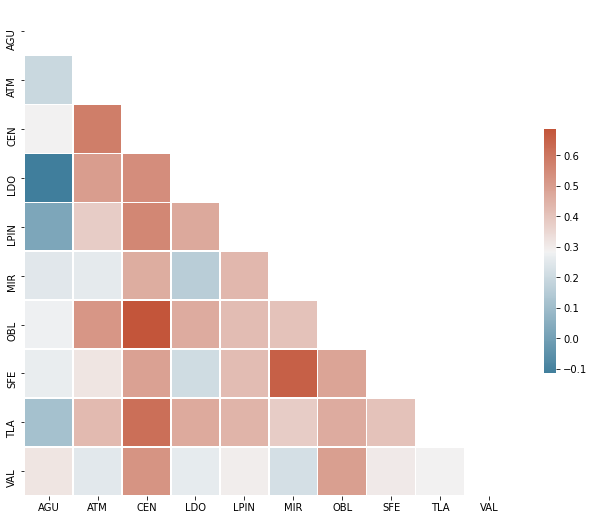

In [6]:
corr = df_data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# mask for the upper correlation
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap=cmap, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

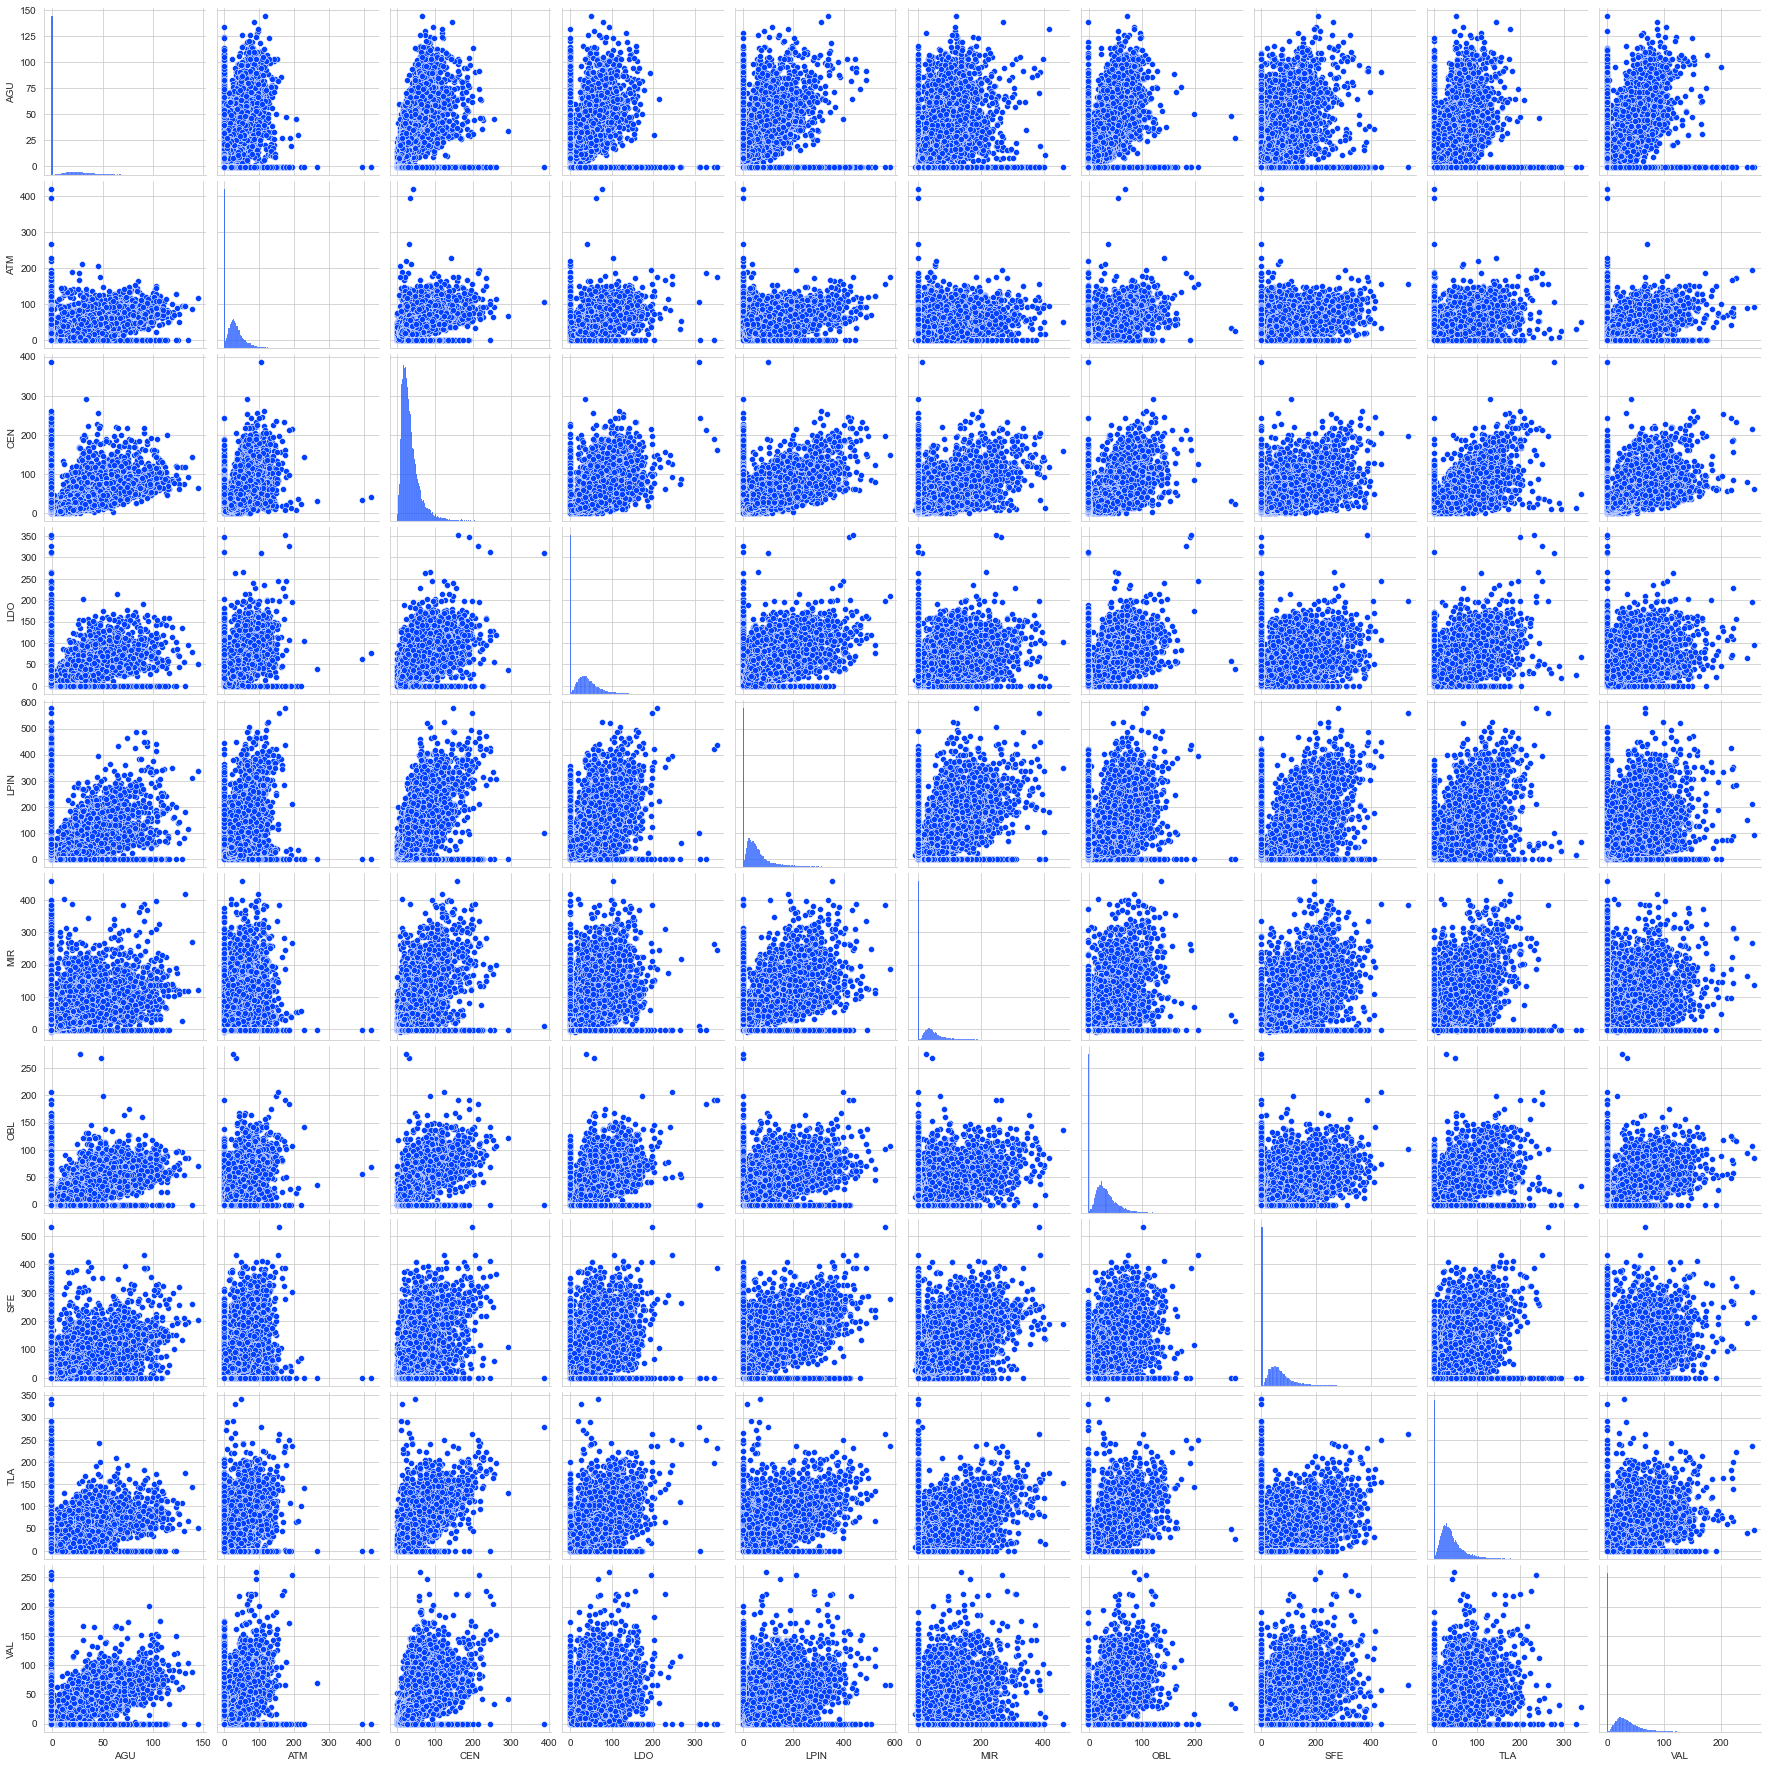

In [7]:
sns.set_style('whitegrid')
sns.pairplot(df_data)
plt.show()

In [50]:
# extract the training data in batches of samples
def get_batch(x_data, y_data, batch_size):
    idxs = np.random.randint(0, len(y_data), batch_size)
    return x_data[idxs,:,:], y_data[idxs]

In [51]:
#optimization variables
epochs = 10
batch_size = 100
# convert x_test to tensor to pass through model (train data will be converted to
# tensors on the fly)
X_test = tf.Variable(X_test)

In [22]:
# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random.normal([9, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random.normal([300]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random.normal([300, 1], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random.normal([1]), name='b2')

In [19]:
def nn_model(x_input, W1, b1, W2, b2):
    x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), W1), b1) #the input data is then converted to tf.float32 type using the TensorFlow cast function. 
                                                                #This is important – the x_input data comes in as tf.float64 type, and TensorFlow won’t perform a 
                                                                #matrix multiplication operation (tf.matmul) between tensors of different data types. 
    x = tf.nn.relu(x)
    logits = tf.add(tf.matmul(x, W2), b2)
    return logits

In [24]:
# setup the optimizer
optimizer = tf.keras.optimizers.Adam()

In [20]:
total_batch = int(len(Y_train) / batch_size)
for epoch in range(epochs):
    avg_loss = 0
    for i in range(total_batch):
        batch_x, batch_y = get_batch(X_train, Y_train, batch_size=batch_size)
        
        # create tensors
        batch_x = tf.Variable(batch_x)
        batch_y = tf.Variable(batch_y)

        with tf.GradientTape() as tape:
            logits = nn_model(batch_x, W1, b1, W2, b2)
            loss = loss_fn(logits, batch_y)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        avg_loss += loss / total_batch
    test_logits = nn_model(x_test, W1, b1, W2, b2)
    max_idxs = tf.argmax(test_logits, axis=1)
    test_acc = np.sum(max_idxs.numpy() == y_test) / len(y_test)
    print(f"Epoch: {epoch + 1}, loss={avg_loss:.3f}, test set      accuracy={test_acc*100:.3f}%")
print("\nTraining complete!")

NameError: name 'y_train' is not defined

In [23]:
nn_model(X_train, W1,b1,W2,b2)

<tf.Tensor: shape=(22003, 1), dtype=float32, numpy=
array([[ 0.35245514],
       [-1.4524174 ],
       [ 0.14021522],
       ...,
       [-2.216776  ],
       [-0.33372992],
       [ 0.16067559]], dtype=float32)>

In [305]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers

tf.keras.regularizers.l1(l1=0.5) #L1 regularization

model = Sequential()
model.add(Dense(10, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_168 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_169 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_170 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_171 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_172 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_173 (Dense)            (None, 50)              

In [306]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [307]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=50,  verbose=0, validation_split=0.2)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


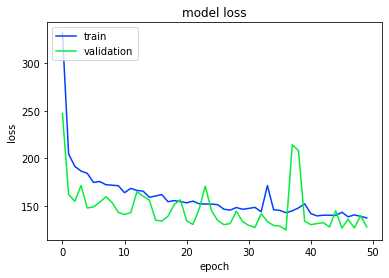

In [308]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [309]:
from sklearn.metrics import r2_score
#train score
y_hat= model.predict(X_train)
r2_score(Y_train, y_hat)

0.8113234530379217

In [310]:
print(history.history['loss'][-1])

137.08551025390625


In [311]:
print(history.history['val_loss'][-1])

127.46354675292969


In [312]:
#test score
y_hat = model.predict(X_test)

#Y_test_re = scaler_y.inverse_transform(Y_test)
#y_hat = scaler_y.inverse_transform(y_hat) 

r2_score(Y_test, y_hat)

0.7974733056486664

In [313]:
y_hat

array([[11.868144],
       [99.7216  ],
       [33.976448],
       ...,
       [27.73198 ],
       [17.873415],
       [41.450638]], dtype=float32)

In [314]:
Y_test #promedio de residuales, desviacion estandar de residuales

array([[  8.615],
       [166.88 ],
       [ 26.88 ],
       ...,
       [ 25.01 ],
       [ 24.   ],
       [ 35.63 ]])

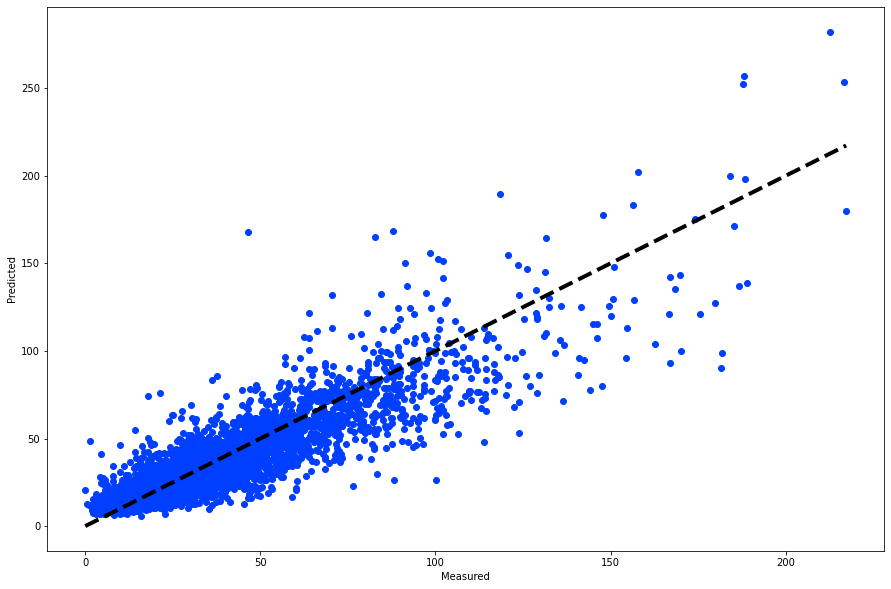

In [258]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(Y_test, y_hat)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Testing code configurations

#### Creating layers

In [317]:
def neuron_layers(nx,nh,ny,hl,act,r):
    
    tf.keras.regularizers.l1(l1=r)
    
    model = Sequential()
    
    for i in range(1, 3+hl):
        
        if i == 1:
            model.add(Dense(nx, input_dim=9, kernel_initializer='normal', activation=act,kernel_regularizer='l1'))
            
        elif i == (2+hl):
            model.add(Dense(ny, activation='linear'))
            
        else:
            model.add(Dense(nh, activation=act))
            
    return model

In [318]:
epochs_ls = [50, 100, 200] #50 y 100, 250
nh_ls = [5,10,25,50,75,100] #minimo 5, maximo 25 de una en una (8-18)
hl_ls = [1,2,3,4,5,6,7,8,9,10] #maximo 3 capas
reg_ls = [1,0.75,0.5,0.1,0.05,0.01,0.005]
activation_ls = ['relu'] #relu

models = {}

i = 1

for e in epochs_ls:
        for nh in nh_ls:
            for hl in hl_ls:
                for r in reg_ls:
                    for a in activation_ls:
                    
                        model = neuron_layers(10,nh,1,hl,a,r)

                        model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

                        history = model.fit(X_train, Y_train, epochs=e, batch_size=50,  verbose=0, validation_split=0.2)

                        #accuracy for train
                        y_hat= model.predict(X_train)
                        acc_train = r2_score(Y_train, y_hat)

                        #accuracy for test
                        y_hat = model.predict(X_test)
                        acc_test = r2_score(Y_test, y_hat)

                        models['model'+str(i)] = [e, nh, hl, a, acc_train, acc_test]

                        print ('*For model',str(i),'settings are:','-epochs:',str(e),'-hidden neurons:',str(nh),'-hidden layers:',str(hl),'-activation:',a,
                               '-regularization cost:',r,
                               '\nAccuracy for training is:', str(acc_train),'Accuracy for test is:',str(acc_test))

                        i += 1 

*For model 1 settings are: -epochs: 50 -hidden neurons: 5 -hidden layers: 1 -activation: relu -regularization cost: 1 
Accuracy for training is: 0.767177493139766 Accuracy for test is: 0.7729807985170473
*For model 2 settings are: -epochs: 50 -hidden neurons: 5 -hidden layers: 1 -activation: relu -regularization cost: 0.75 
Accuracy for training is: 0.7731823564405294 Accuracy for test is: 0.7863405567465785
*For model 3 settings are: -epochs: 50 -hidden neurons: 5 -hidden layers: 1 -activation: relu -regularization cost: 0.5 
Accuracy for training is: 0.7780088849659437 Accuracy for test is: 0.7873429586392116
*For model 4 settings are: -epochs: 50 -hidden neurons: 5 -hidden layers: 1 -activation: relu -regularization cost: 0.1 
Accuracy for training is: 0.7639709965842975 Accuracy for test is: 0.7615581295732288
*For model 5 settings are: -epochs: 50 -hidden neurons: 5 -hidden layers: 1 -activation: relu -regularization cost: 0.05 
Accuracy for training is: 0.7443761739638564 Accurac

In [322]:
df_models = pd.DataFrame(models)
df_models.head(1)

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,...,model1251,model1252,model1253,model1254,model1255,model1256,model1257,model1258,model1259,model1260
0,50,50,50,50,50,50,50,50,50,50,...,200,200,200,200,200,200,200,200,200,200


In [323]:
df_models.to_csv('../data/nn_models_vRegL1.csv')

## Testing data entries

## Previous model

In [1]:
import pandas as pd

In [36]:
nn = pd.read_csv('../data/nn_models_vRegL1.csv')
nn.loc[nn['Unnamed: 0']==0, ['Unnamed: 0']]='epochs'
nn.loc[nn['Unnamed: 0']==1, ['Unnamed: 0']]='hidden neurons'
nn.loc[nn['Unnamed: 0']==2, ['Unnamed: 0']]='hidden layers'
nn.loc[nn['Unnamed: 0']==3, ['Unnamed: 0']]='activation'
nn.loc[nn['Unnamed: 0']==4, ['Unnamed: 0']]='r2_train'
nn.loc[nn['Unnamed: 0']==5, ['Unnamed: 0']]='r2_test'
nn

,Unnamed: 0,model1,model2,model3,model4,model5,model6,model7,model8,model9,...,model171,model172,model173,model174,model175,model176,model177,model178,model179,model180
0,epochs,100,100,100,100,100,100,100,100,100,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,hidden neurons,1,1,1,1,1,1,1,1,1,...,100,100,100,100,100,100,100,100,100,100
2,hidden layers,1,1,1,2,2,2,3,3,3,...,2,3,3,3,4,4,4,5,5,5
3,activation,relu,sigmoid,tanh,relu,sigmoid,tanh,relu,sigmoid,tanh,...,tanh,relu,sigmoid,tanh,relu,sigmoid,tanh,relu,sigmoid,tanh
4,r2_train,0.75772368233899,0.6946146144846069,0.6948718913408958,-1.900408135591114e-05,0.697834398340376,0.7022762540735648,-0.0009876611397527935,0.6968134784970189,0.6956905122841608,...,0.7924490677550904,0.8671291267050998,0.7876573139674223,0.823937046400693,0.8613940010110483,0.7855336755411968,0.8521745729625578,0.8984421219359231,0.7966796852587338,0.8578990190767712
5,r2_test,0.7733466632813091,0.7252895098256311,0.7216819241913441,-2.4713022559463838e-06,0.7260502270693647,0.7325644942514157,-0.0007971299546680743,0.7234252712720326,0.7251493000044944,...,0.797650848596308,0.7435296199631145,0.7863365335551981,0.7879507268314044,0.7550801024473459,0.7808042617215456,0.747035722346199,0.7183570047540386,0.7807908900581033,0.7320377462943606


In [38]:
nn.pivot(columns='')

0
Unnamed: 0 0              epochs
           1      hidden neurons
           2       hidden layers
           3          activation
           4            r2_train
...                          ...
model180   1                 100
           2                   5
           3                tanh
           4  0.8578990190767712
           5  0.7320377462943606

[1086 rows x 1 columns]